# Resonator Coupling

---

### 0.1 Prerequisite

- When changing the python class in the lib directory please restart kernel.
- When launching the jupyter notebook please always firstly run this cell.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants
import scipy.sparse.linalg
import scipy.sparse as sparse
import qutip.settings as settings
import seaborn as sns
from tqdm import tqdm
import qutip as qt

qt.settings.atol = 1e-100
qt.settings.auto_tidyup_atol = qt.settings.atol

current_dir = os.getcwd()
# Get the parent folder path
parent_dir = os.path.dirname(current_dir)
# Add the parent folder path to sys.path
sys.path.append(parent_dir)

from lib.qubit import qubit
from lib.circuit_res_coupling import circuit_res

# plt.style.use("Solarize_Light2")
plt.style.use('dark_background')
thememap = 'viridis'

# Setting up constants
h = constants.h
hbar = constants.hbar
pi = np.pi

---

## 2. Cavity Coupling

### 2.1 Visualization of the Hamiltonian

In [4]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 12e-15
Cc2 = 12e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 5
ncut_t = 5

L_res = 10e-9
C_res = 100e-15
m_cut = 5

# Creation of circuit object
system_10 = circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0, ncut_t)])

system_10.print_params()


Ejp:    9.000000000000002 GHz
Ec:    0.12913486216439415 GHz
Cj:    150.0 fF
Ejp/Ecp : 69.69458014012218
w_01:    2.917205336056951 GHz
ng:    0.5
Ejp:    8.000000000000002 GHz
Ec:    0.11394252543917131 GHz
Cj:    170.0 fF
Ejp/Ecp : 70.21083628930828
w_01:    2.5823515388878544 GHz
ng:    0
Cc1:    12.0 fF
Cc2:    12.0 fF
Cr:    100.0 fF
Lr:    10.0 nH
Z0:    316.22776601683796 Ohm


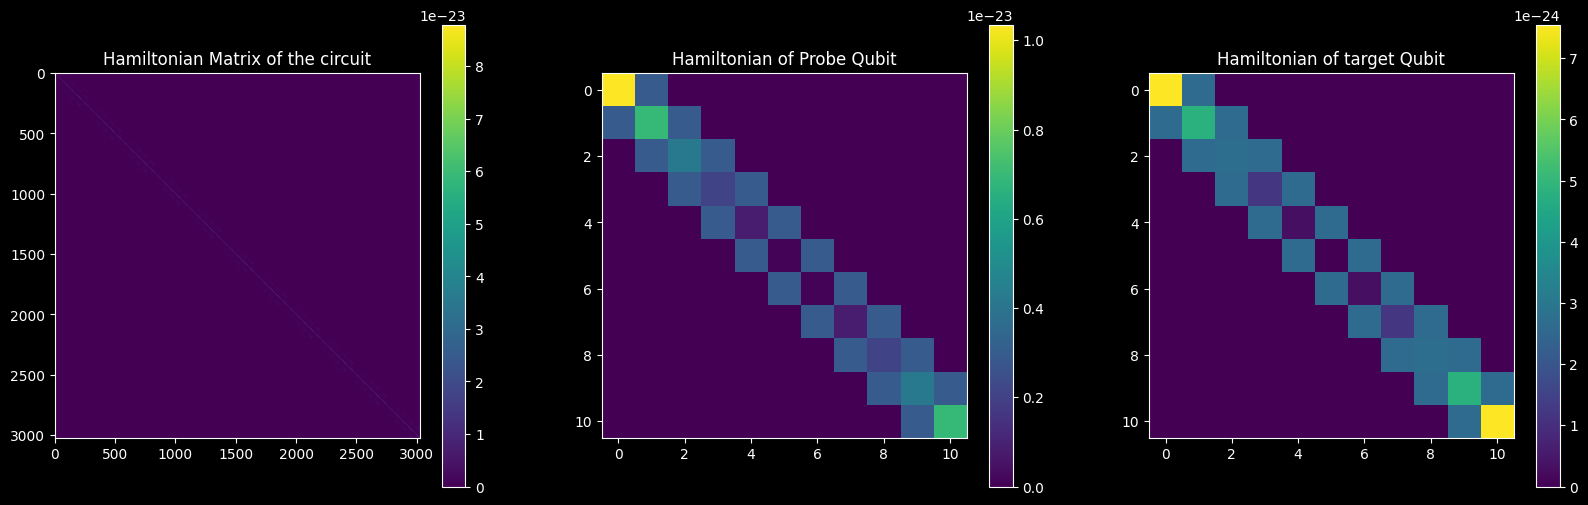

In [7]:
# Exctracting the Hamiltonian
H_circ = system_10.get_H_circuit()
H_p = system_10.get_H_probe()
H_t = system_10.get_H_target()
H_res = system_10.get_H_resonator()

f = plt.figure(figsize=(20,6))

# Plotting the Hamiltonian
ax1 = f.add_subplot(131)
ax1.title.set_text('Hamiltonian Matrix of the circuit')
im1 = ax1.imshow(np.absolute(H_circ.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(132)
ax2.title.set_text('Hamiltonian of Probe Qubit')
im2 = ax2.imshow(np.absolute(H_p.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)


ax3 = f.add_subplot(133)
ax3.title.set_text('Hamiltonian of target Qubit')
im3 = ax3.imshow(np.absolute(H_t.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im3)

# ax4 = f.add_subplot(134)
# ax4.title.set_text('Hamiltonian of resonator')
# im4 = ax4.imshow(np.real(H_res), cmap=plt.get_cmap(thememap))
# f.colorbar(im4)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# ax4.grid(False)

plt.show()

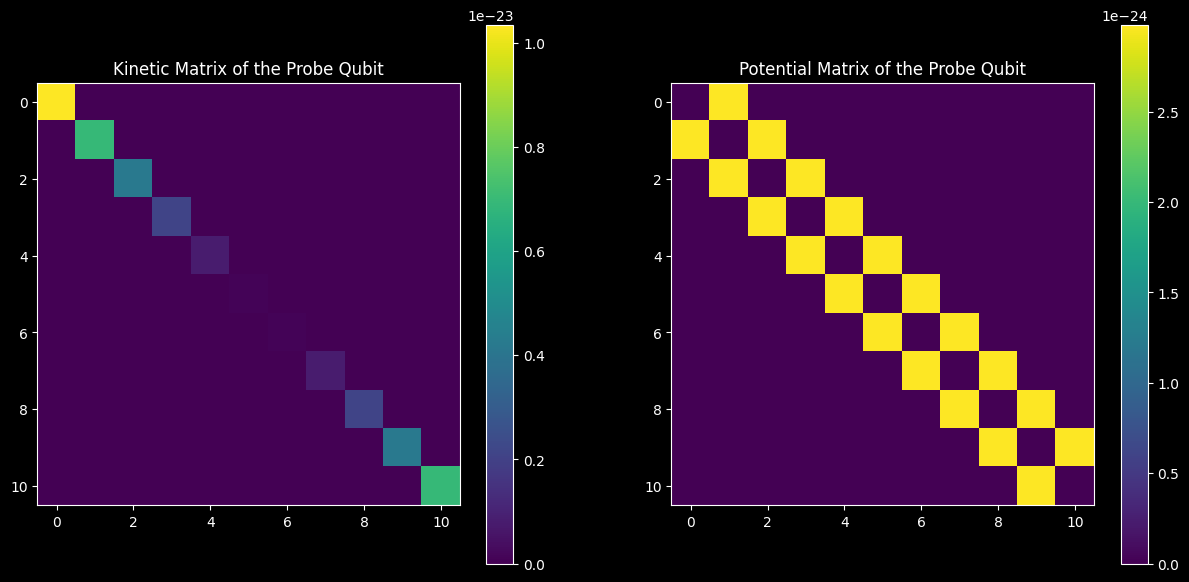

In [8]:
kin_probe = system_10.get_kinetic_probe()
pot_probe = system_10.get_potential_probe()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Probe Qubit')
im1 = ax1.imshow(np.absolute(kin_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Probe Qubit')
im2 = ax2.imshow(np.absolute(pot_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)

ax1.grid(False)
ax2.grid(False)

plt.show()

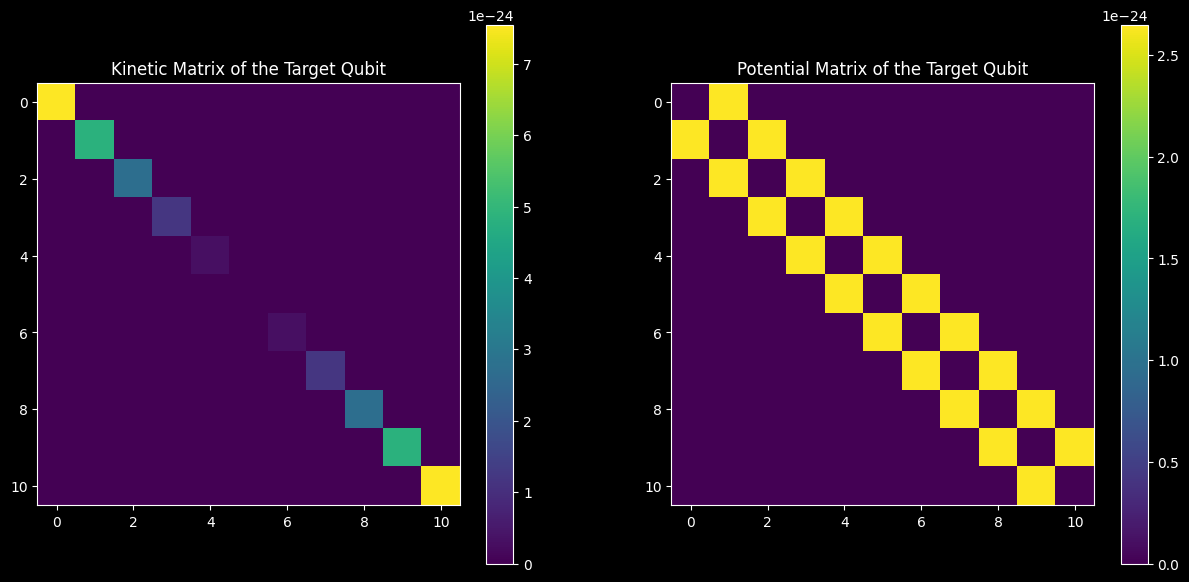

In [9]:
kin_target = system_10.get_kinetic_target()
pot_target = system_10.get_potential_target()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Target Qubit')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Target Qubit')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

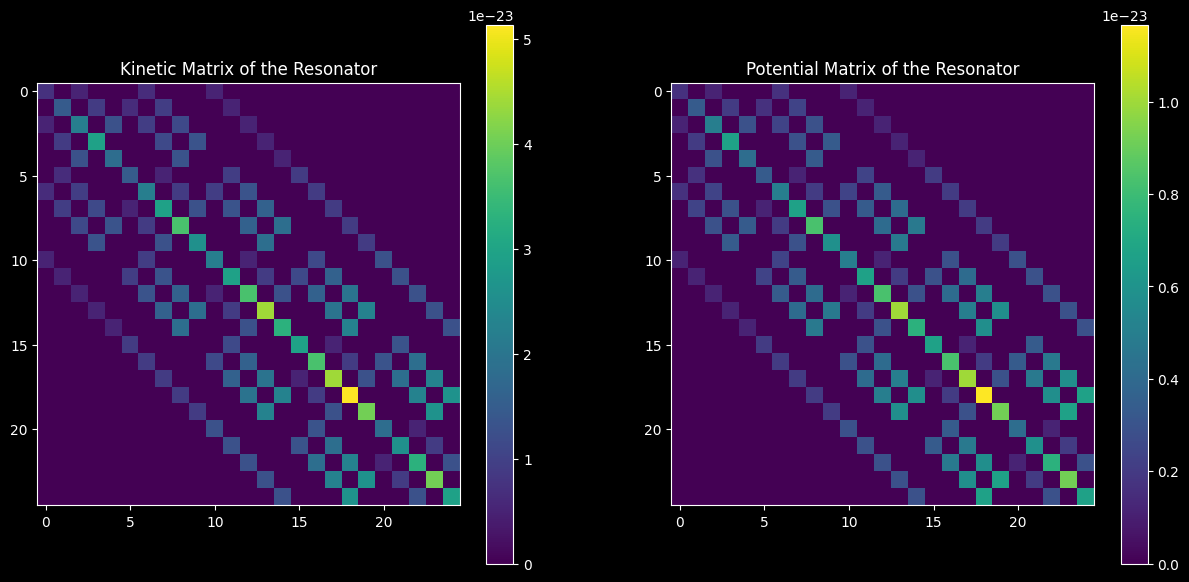

In [10]:
kin_target = system_10.get_kinetic_resonator()
pot_target = system_10.get_potential_resonator()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Resonator')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Resonator')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

### 2.2 Calculate Interaction

#### 2.2.1 Static visualization

Ejp:    9.000000000000002 GHz
Ec:    0.12913486216439415 GHz
Cj:    150.0 fF
Ejp/Ecp : 69.69458014012218
w_01:    2.9138875699855906 GHz
ng:    0.5
Ejp:    4.000000000000001 GHz
Ec:    0.06456743108219708 GHz
Cj:    300.0 fF
Ejp/Ecp : 61.95073790233083
w_01:    1.3695342034817182 GHz
ng:    0
wr:    159.15494309189538 Ghz
Cc1:    40.0 fF
Cc2:    40.0 fF
Cr:    1.0 fF
Lr:    1.0 nH
Z0:    1000.0 Ohm
(0.0019404388714733547+0j)
(2, 10)
[[-3.43957427e-18+0.j -1.74166486e-18+0.j -4.16467498e-18+0.j
  -3.78090310e-18+0.j  5.57694964e-19+0.j -1.63077909e-17+0.j
  -2.04448254e-17+0.j  2.56031775e-16+0.j -3.99678236e-16+0.j
   2.88035499e-15+0.j]
 [-3.43957427e-18+0.j -1.74166486e-18+0.j -4.16467498e-18+0.j
  -3.78090310e-18+0.j  5.57694964e-19+0.j -1.63077909e-17+0.j
  -2.04448254e-17+0.j  2.56031775e-16+0.j -3.99678236e-16+0.j
   2.88035499e-15+0.j]]


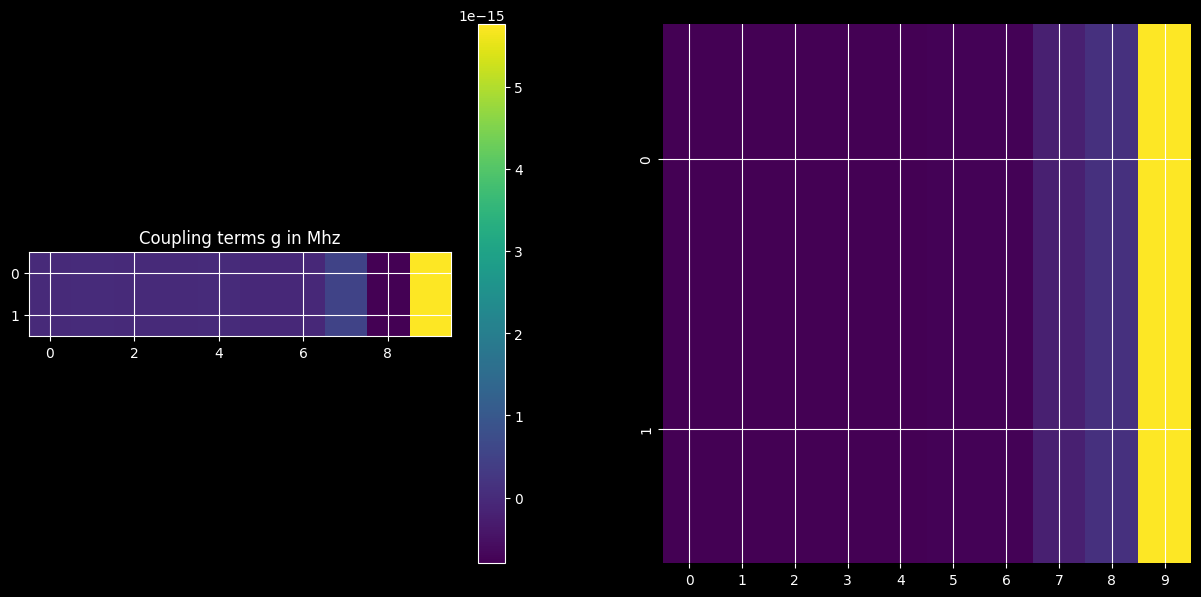

In [11]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 40e-15
Cc2 = 40e-15

Ej_p = 9e9
Ej_t = 4e9
Cp = 150e-15
Ct = 300e-15
ncut_p = 10
ncut_t = 10

L_res = 1e-9
C_res = 10e-16
m_cut = 10

# Creation of circuit object
system_2= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0, ncut_t)])

system_2.print_params()

J_matrix = system_2.get_J()
print(J_matrix.shape * 1e-9 / constants.hbar)
print(J_matrix * 1e-9 / constants.hbar)

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Coupling terms g in Mhz')
im1 = ax1.imshow(2* np.real(J_matrix) * 1e-9 / constants.hbar, cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
sns.heatmap(np.absolute(J_matrix) * 1e-9 / constants.h, cmap=plt.get_cmap(thememap), ax=ax2, cbar=False)

ax1.grid(True)
plt.show()



#### 2.2.2 Coupling regarding defining parameters